# Lab4: Bài thực hành chuẩn bị dữ liệu

## 1. Viết hàm load_data() để tải dữ liệu lên ứng dụng. Sau đó, hiển thị ra màn hình 10 dòng đầu tiên.

In [3]:
import pandas as pd 

In [9]:
def load_data(filename):
    return pd.read_csv(filename)

filename = "titanic_disaster.csv"
titanic_disaster = load_data(filename)
print(titanic_disaster.head(10))


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

## 2. Thống kê dữ liệu thiếu trên các biến số và trực quan hóa dữ liệu thiếu bằng biểu đồ (Heatmap). Hãy cho nhận xét về tình trạng thiếu dữ liệu Age, Cabin và Embarked

In [10]:
dfage = titanic_disaster[titanic_disaster['Age'].isna()]
print(dfage.count())

dfcabin = titanic_disaster[titanic_disaster['Cabin'].isna()]
print(dfcabin.count())

dfembarked = titanic_disaster[titanic_disaster['Embarked'].isna()]
print(dfembarked.count())

PassengerId    177
Survived       177
Pclass         177
Name           177
Sex            177
Age              0
SibSp          177
Parch          177
Ticket         177
Fare           177
Cabin           19
Embarked       177
dtype: int64
PassengerId    687
Survived       687
Pclass         687
Name           687
Sex            687
Age            529
SibSp          687
Parch          687
Ticket         687
Fare           687
Cabin            0
Embarked       687
dtype: int64
PassengerId    2
Survived       2
Pclass         2
Name           2
Sex            2
Age            2
SibSp          2
Parch          2
Ticket         2
Fare           2
Cabin          2
Embarked       0
dtype: int64


In [8]:
import seaborn as sns

<Axes: >

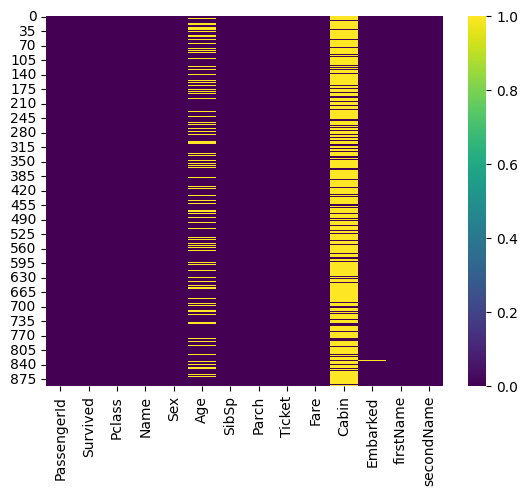

In [16]:
# Trực quan hóa bằng heatmap
sns.heatmap(titanic_disaster.isna(), cmap='viridis')

## 3. Xử lý tên cột tên Name, tách ra làm 2 cột: firstName và secondName. Lưu ý: Sau khi tách cột xong thì xóa luôn cột Name

In [12]:
titanic_disaster[['firstName', 'secondName']] = titanic_disaster['Name'].str.split(',', expand=True)
titanic_disaster_splitname = titanic_disaster.drop("Name",axis=1)
titanic_disaster_splitname.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


# 4. Xứ lý rút gọn kích thước dữ liệu trên cột Sex như sau: thay thế male → M và female → F

In [13]:
def substitude_Sex(x_df):
    mapping = {'male':'M', 'female':'F'}
    x_df['Sex']=x_df['Sex'].map(mapping)
    return x_df

titanic_disaster5 = titanic_disaster_splitname.pipe(substitude_Sex)
titanic_disaster5.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


# 5. Xử lý dữ liệu thiếu trên biến Age bằng cách thay thế bằng giá trị trung bình tuổi: Hãy đưa ra quyết định dùng giá trị trung bình tuổi toàn bộ hành khách hay theo từng nhóm hạng vé (hạng hành khách: Pclass). Ta tiến hành làm các bước sau
## a. Sử dụng Seaborn để vẽ biểu đồ (Box plot) trực quan dữ liệu để xác định phân phối tuổi trên từng hạng hành khách. Nhận xét về tuổi trung bình giữa các nhóm hành khách. Từ đó đưa ra quyết định cách thay thế giá trị tuổi bị thiếu.

<Axes: xlabel='Pclass', ylabel='Age'>

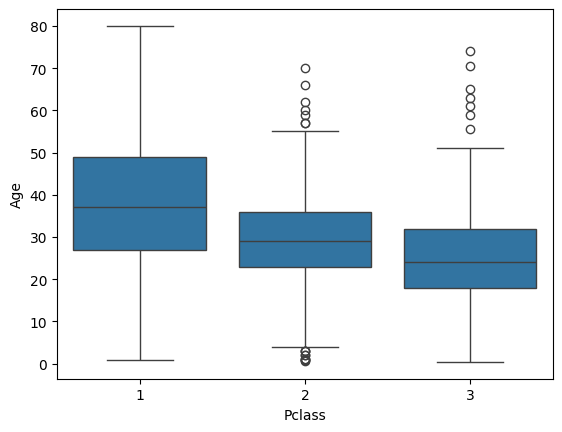

In [18]:
sns.boxplot(y='Age', x='Pclass', data=titanic_disaster5)

## b. Tiến hành thay thế giá trị Age bị thiếu. Sau đó, hiển thị kết quả dạng bảng và trực quan dữ liệu đã xử lý thiếu cho cột’Age’ bằng biểu đồ Heat map.


In [28]:
titanic_disaster5['Age'][titanic_disaster5['Pclass']==1].fillna(titanic_disaster5['Age'][titanic_disaster5['Pclass']==1].median(), inplace=False)
titanic_disaster5['Age'][titanic_disaster5['Pclass']==2].fillna(titanic_disaster5['Age'][titanic_disaster5['Pclass']==2].median(), inplace=False)
titanic_disaster5['Age'][titanic_disaster5['Pclass']==3].fillna(titanic_disaster5['Age'][titanic_disaster5['Pclass']==3].median(), inplace=False)

0      22.0
2      26.0
4      35.0
5      24.0
7       2.0
       ... 
882    22.0
884    25.0
885    39.0
888    24.0
890    32.0
Name: Age, Length: 491, dtype: float64

# 6. Xây dựng biến số Agegroup có thang đo thứ tự được ánh xạ theo thang đo khoảng dựa trên độ tuổi của hành khách như sau: (age =< 12] → Kid; (12, 18]: Teen, (18, 60]: Adult và ( age > 60): Older

In [26]:
titanic_disaster5.loc[(titanic_disaster5['Age']<=12), 'Agegroup'] = 'Kid'
titanic_disaster5.loc[(titanic_disaster5['Age']>12) &(titanic_disaster5['Age'] <18), 'Agegroup'] = 'Teen'
titanic_disaster5.loc[(titanic_disaster5['Age']>=18) &(titanic_disaster5['Age'] <=60), 'Agegroup'] = 'Adult'
titanic_disaster5.loc[(titanic_disaster5['Age']<=60), 'Agegroup'] = 'Older'

titanic_disaster5.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName,Agegroup
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,Older
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Older
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,Older
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Older
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,Older


# 7. Tiến hành thêm đặc trưng về danh xưng (namePrefix) trong xã hội bằng cách tách Mr, Mrs, Miss, Master ra khỏi “secondName”

In [27]:
listNamePrefix=[]
for index,row in titanic_disaster5.iterrows():
    vitri = row['secondName'].strip().find(' ')
    secondName = row['secondName'].strip()
    namePrefix = secondName[vitri+1:]
    listNamePrefix.append(namePrefix)

cotNamePrefix = pd.DataFrame(listNamePrefix, columns=['namePrefix'])

titanic_disaster5 = pd.concat([titanic_disaster5, cotNamePrefix], axis=1, sort=False)

print(titanic_disaster5)

     PassengerId  Survived  Pclass Sex   Age  SibSp  Parch            Ticket  \
0              1         0       3   M  22.0      1      0         A/5 21171   
1              2         1       1   F  38.0      1      0          PC 17599   
2              3         1       3   F  26.0      0      0  STON/O2. 3101282   
3              4         1       1   F  35.0      1      0            113803   
4              5         0       3   M  35.0      0      0            373450   
..           ...       ...     ...  ..   ...    ...    ...               ...   
886          887         0       2   M  27.0      0      0            211536   
887          888         1       1   F  19.0      0      0            112053   
888          889         0       3   F  24.0      1      2        W./C. 6607   
889          890         1       1   M  26.0      0      0            111369   
890          891         0       3   M  32.0      0      0            370376   

        Fare Cabin Embarked  firstName 

# 8.Khai thác thêm thông tin số lượng thành viên đi theo nhóm thân quen (familySize) đối với mỗi hành khách trên chuyến hải trình; family size = 1+ SibSp + Parch

In [4]:
file_path = "titanic_disaster.csv"  
df = pd.read_csv(file_path)

if "SibSp" in df.columns and "Parch" in df.columns:
    df["familySize"] = 1 + df["SibSp"] + df["Parch"]
    
    output_file = "titanic_disaster_updated.csv"
    df.to_csv(output_file, index=False)
    print(f"File đã cập nhật, lưu tại: {output_file}")
else:
    print("Cột 'SibSp' hoặc 'Parch' không tồn tại trong dữ liệu. Kiểm tra lại tên cột.")


File đã cập nhật, lưu tại: titanic_disaster_updated.csv


# 9. Tạo thêm đặc trưng ‘Alone’ để xác định hành khách đi theo nhóm hay cá nhân bằng cách dựa trên familySize như sau: Nếu familySize = 0 thì giá trị Alone = 1 và ngược lại là 0.

In [5]:
file_path = "titanic_disaster_updated.csv"  
df = pd.read_csv(file_path)

df["Alone"] = df["familySize"].apply(lambda x: 1 if x == 1 else 0)

output_file = "titanic_disaster_with_alone.csv"
df.to_csv(output_file, index=False)

print(f"File đã cập nhật, lưu tại: {output_file}")


File đã cập nhật, lưu tại: titanic_disaster_with_alone.csv


# 10. Tiến hành tách loại cabin (typeCabin) mà hành khách ở để lọc và phân tích đặc tính cabin. Loại cabin được kí hiệu bởi chữ cái đầu tiên. Lưu ý: Đối với dữ liệu cabin bị thiếu thì thay thế bằng “Unknown”

In [6]:
file_path = "titanic_disaster_with_alone.csv"
df = pd.read_csv(file_path)

if "Cabin" in df.columns:
    df["typeCabin"] = df["Cabin"].fillna("Unknown").apply(lambda x: x[0] if x != "Unknown" else "Unknown")

    output_file = "titanic_disaster_with_typeCabin.csv"
    df.to_csv(output_file, index=False)

    print(f"File đã cập nhật, lưu tại: {output_file}")
else:
    print("Cột 'Cabin' không tồn tại trong dữ liệu. Kiểm tra lại tên cột!")


File đã cập nhật, lưu tại: titanic_disaster_with_typeCabin.csv


# 12. Trực quan thông tin tương quan tỉ lệ sống sót và thiệt mạng trên từng nhóm giới tính.

In [10]:
import matplotlib.pyplot as plt

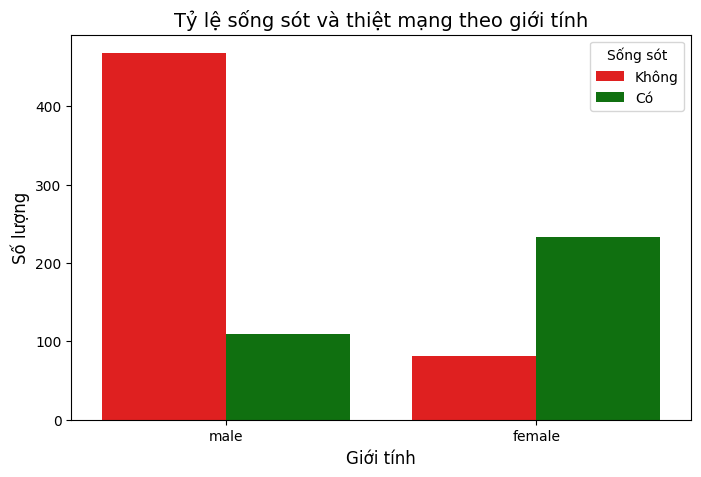

In [ ]:
file_path = "titanic_disaster.csv" 
df = pd.read_csv(file_path)

plt.figure(figsize=(8, 5))

sns.countplot(data=df, x="Sex", hue="Survived", palette=["red", "green"])

plt.title("Tỷ lệ sống sót và thiệt mạng theo giới tính", fontsize=14)
plt.xlabel("Giới tính", fontsize=12)
plt.ylabel("Số lượng", fontsize=12)
plt.legend(title="Sống sót", labels=["Không", "Có"])

plt.show()


# 13. Trực quan thông tin hành khách sống sót trên từng nhóm phân loại hành khách (Pclass).

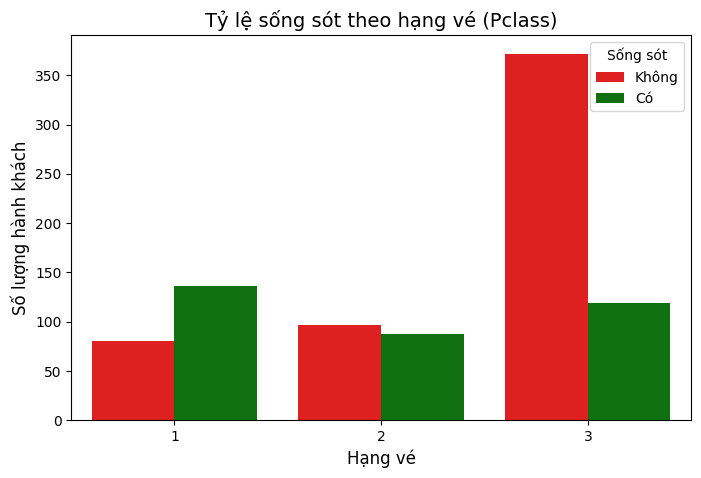

In [11]:
file_path = "titanic_disaster.csv" 
df = pd.read_csv(file_path)

plt.figure(figsize=(8, 5))

sns.countplot(data=df, x="Pclass", hue="Survived", palette=["red", "green"])

plt.title("Tỷ lệ sống sót theo hạng vé (Pclass)", fontsize=14)
plt.xlabel("Hạng vé", fontsize=12)
plt.ylabel("Số lượng hành khách", fontsize=12)
plt.legend(title="Sống sót", labels=["Không", "Có"])

plt.show()


# 14. Trực quan thông tin hành khách sống sót trên từng nhóm giới tính và thang đo tuổi tác

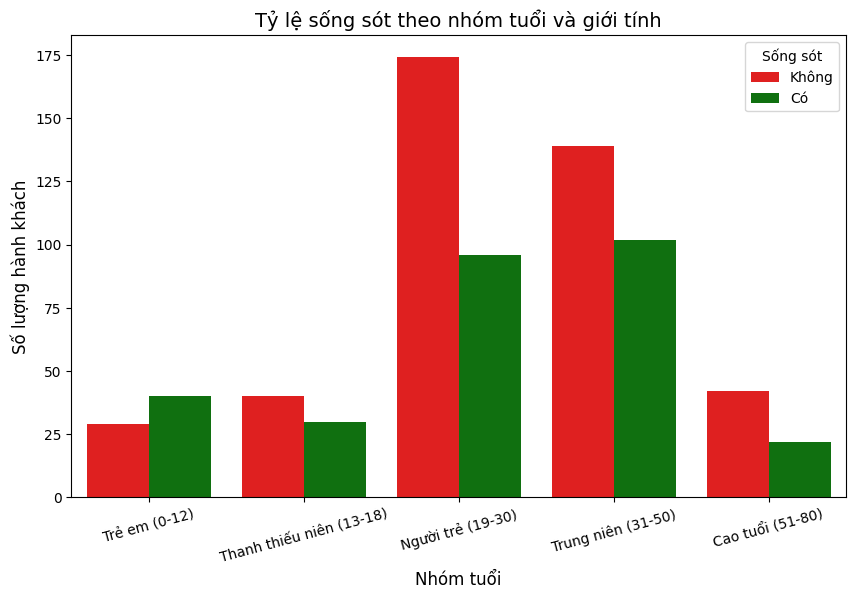

In [12]:
file_path = "titanic_disaster.csv" 
df = pd.read_csv(file_path)

df = df.dropna(subset=["Age"])  

age_bins = [0, 12, 18, 30, 50, 80]
age_labels = ["Trẻ em (0-12)", "Thanh thiếu niên (13-18)", "Người trẻ (19-30)", "Trung niên (31-50)", "Cao tuổi (51-80)"]
df["AgeGroup"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels)

plt.figure(figsize=(10, 6))

sns.countplot(data=df, x="AgeGroup", hue="Survived", palette=["red", "green"], dodge=True)

plt.title("Tỷ lệ sống sót theo nhóm tuổi và giới tính", fontsize=14)
plt.xlabel("Nhóm tuổi", fontsize=12)
plt.ylabel("Số lượng hành khách", fontsize=12)
plt.legend(title="Sống sót", labels=["Không", "Có"])

plt.xticks(rotation=15)
plt.show()


# 15. Trực quan xác suất hành khách sống sót dựa trên thông tin nhóm đi cùng

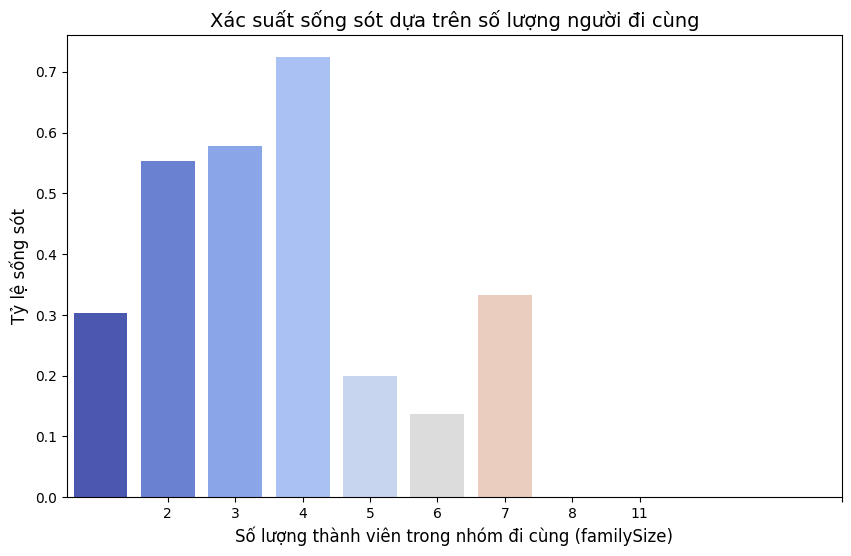

In [14]:
file_path = "titanic_disaster.csv"  
df = pd.read_csv(file_path)

df["familySize"] = 1 + df["SibSp"] + df["Parch"]

survival_rates = df.groupby("familySize")["Survived"].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=survival_rates.index, y=survival_rates.values, hue=survival_rates.index, palette="coolwarm", legend=False)


plt.title("Xác suất sống sót dựa trên số lượng người đi cùng", fontsize=14)
plt.xlabel("Số lượng thành viên trong nhóm đi cùng (familySize)", fontsize=12)
plt.ylabel("Tỷ lệ sống sót", fontsize=12)
plt.xticks(survival_rates.index) 

plt.show()


# 16. Trực quan xác suất hành khách sống sót dựa trên thông tin giá vé

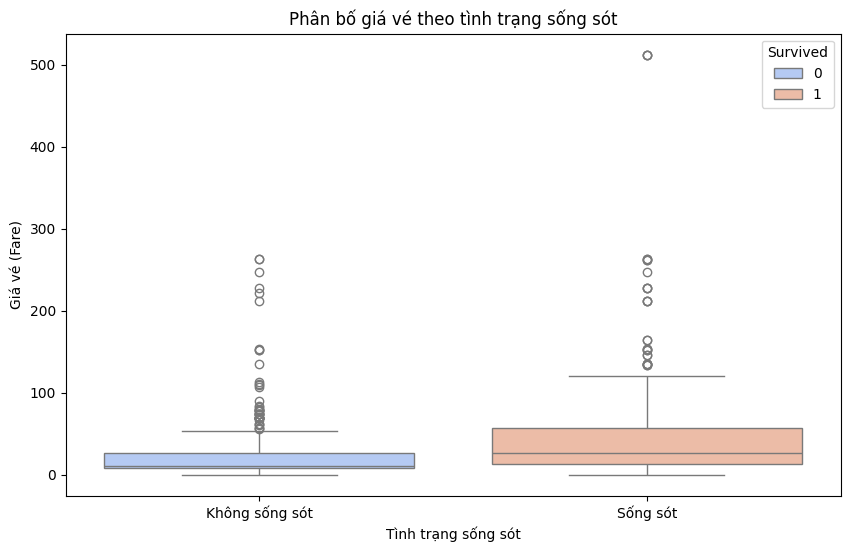

In [20]:
titanic_df = pd.read_csv("titanic_disaster.csv")

plt.figure(figsize=(10, 6))
sns.boxplot(x="Survived", y="Fare", hue="Survived", data=titanic_df, palette="coolwarm")

plt.xticks([0, 1], ["Không sống sót", "Sống sót"])
plt.xlabel("Tình trạng sống sót")
plt.ylabel("Giá vé (Fare)")
plt.title("Phân bố giá vé theo tình trạng sống sót")

plt.show()


# 17. Trực quan số lượng người thiệt mạng và sống sót theo phân lớp (Pclass) hành khách và cảng sẽ cập bến.

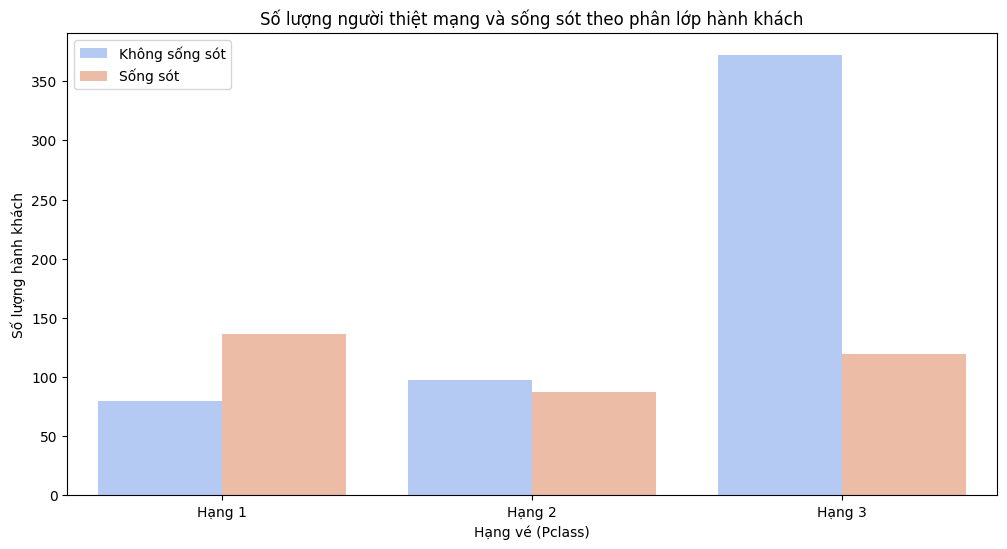

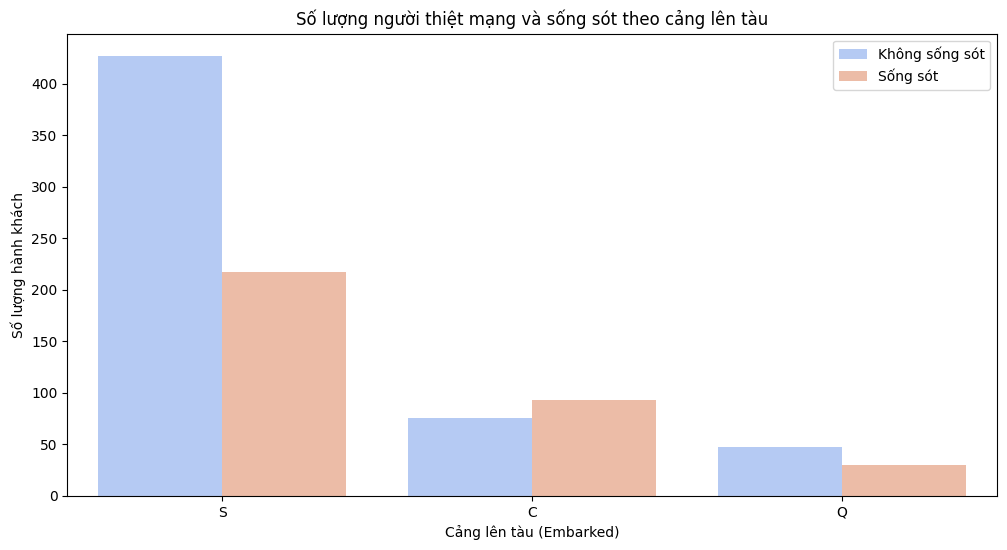

In [21]:
titanic_df = pd.read_csv("titanic_disaster.csv")

plt.figure(figsize=(12, 6))
sns.countplot(x="Pclass", hue="Survived", data=titanic_df, palette="coolwarm")

plt.xlabel("Hạng vé (Pclass)")
plt.ylabel("Số lượng hành khách")
plt.title("Số lượng người thiệt mạng và sống sót theo phân lớp hành khách")
plt.xticks([0, 1, 2], ["Hạng 1", "Hạng 2", "Hạng 3"])
plt.legend(["Không sống sót", "Sống sót"])

plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x="Embarked", hue="Survived", data=titanic_df, palette="coolwarm")

plt.xlabel("Cảng lên tàu (Embarked)")
plt.ylabel("Số lượng hành khách")
plt.title("Số lượng người thiệt mạng và sống sót theo cảng lên tàu")
plt.legend(["Không sống sót", "Sống sót"])

plt.show()
